In [1]:
%load_ext autoreload
%autoreload 2

import logging
import os
import sys

l = logging.getLogger()
lh = logging.StreamHandler(sys.stdout)
l.addHandler(lh)
l.setLevel(logging.INFO)

import torch

import experiment
import cpn

cfg = experiment.experiment.get_config(recover_after_lesion=False, cuda="0")

LOG_DIR = "/home/mbryan/Projects/coproc/coproc-poc/models"
my_coproc = cpn.CPN_EN_CoProc(cfg, log_dir=LOG_DIR)

In [2]:
my_experiment = experiment.experiment.stage(my_coproc, cfg)

In [ ]:
# Start running experiment; this and the next cell can be killed with
#  ctrl+c, and resumed with the cell below.

loss_history = my_experiment.run()

en 0 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.033838', 'pred_val_loss': '0.050000'}
en 1 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.032307', 'pred_val_loss': '0.050000'}
en 2 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.026448', 'pred_val_loss': '0.050000'}
en 3 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.021456', 'pred_val_loss': '0.050000'}
en 4 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.017792', 'pred_val_loss': '0.050000'}
en 5 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.017088', 'pred_val_loss': '0.050000'}
en 6 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-

en 54 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.009207', 'pred_val_loss': '0.007672'}
en 55 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.008775', 'pred_val_loss': '0.007672'}
en 56 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.008850', 'pred_val_loss': '0.007672'}
en 57 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.008455', 'pred_val_loss': '0.007672'}
en 58 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.008066', 'pred_val_loss': '0.007672'}
en 59 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.007892', 'pred_val_loss': '0.007672'}
en 60 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_lo

en 108 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.003220', 'pred_val_loss': '0.001828'}
en 109 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.003151', 'pred_val_loss': '0.001828'}
en 110 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.003151', 'pred_val_loss': '0.001576'}
en 111 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.003230', 'pred_val_loss': '0.001576'}
en 112 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.003010', 'pred_val_loss': '0.001576'}
en 113 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 'train_loss': '-', 'pred_loss': '0.003042', 'pred_val_loss': '0.001576'}
en 114 task_loss: - pct_recov: - class_separation: - user: {'epoch_type': 'EN', 't

en 157 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.008247', 'pred_val_loss': '0.004058'}
en 158 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.007814', 'pred_val_loss': '0.004058'}
en 159 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.007578', 'pred_val_loss': '0.004058'}
en 160 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.007578', 'pred_val_loss': '0.003126'}
en 161 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.007588', 'pred_val_loss': '0.003126'}
en 162 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 204 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.003052', 'pred_val_loss': '0.001394'}
en 205 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.002968', 'pred_val_loss': '0.001394'}
en 206 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.002905', 'pred_val_loss': '0.001394'}
en 207 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.002990', 'pred_val_loss': '0.001394'}
en 208 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.002907', 'pred_val_loss': '0.001394'}
en 209 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 251 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001920', 'pred_val_loss': '0.000581'}
en 252 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001906', 'pred_val_loss': '0.000581'}
en 253 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001908', 'pred_val_loss': '0.000581'}
en 254 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001913', 'pred_val_loss': '0.000581'}
en 255 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001834', 'pred_val_loss': '0.000581'}
en 256 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 298 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001832', 'pred_val_loss': '0.000558'}
en 299 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001848', 'pred_val_loss': '0.000558'}
en 300 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001848', 'pred_val_loss': '0.000553'}
en 301 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001824', 'pred_val_loss': '0.000553'}
en 302 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001977', 'pred_val_loss': '0.000553'}
en 303 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 345 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001752', 'pred_val_loss': '0.000530'}
en 346 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001783', 'pred_val_loss': '0.000530'}
en 347 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001783', 'pred_val_loss': '0.000530'}
en 348 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001700', 'pred_val_loss': '0.000530'}
en 349 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001759', 'pred_val_loss': '0.000530'}
en 350 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 392 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001750', 'pred_val_loss': '0.000503'}
en 393 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001711', 'pred_val_loss': '0.000503'}
en 394 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001705', 'pred_val_loss': '0.000503'}
en 395 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001685', 'pred_val_loss': '0.000503'}
en 396 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001665', 'pred_val_loss': '0.000503'}
en 397 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 439 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001652', 'pred_val_loss': '0.000483'}
en 440 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001652', 'pred_val_loss': '0.000478'}
en 441 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001657', 'pred_val_loss': '0.000478'}
en 442 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001649', 'pred_val_loss': '0.000478'}
en 443 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001638', 'pred_val_loss': '0.000478'}
en 444 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 486 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001582', 'pred_val_loss': '0.000462'}
en 487 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001614', 'pred_val_loss': '0.000462'}
en 488 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001584', 'pred_val_loss': '0.000462'}
en 489 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001567', 'pred_val_loss': '0.000462'}
en 490 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001567', 'pred_val_loss': '0.000458'}
en 491 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 533 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001551', 'pred_val_loss': '0.000444'}
en 534 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001537', 'pred_val_loss': '0.000444'}
en 535 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001569', 'pred_val_loss': '0.000444'}
en 536 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001491', 'pred_val_loss': '0.000444'}
en 537 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001548', 'pred_val_loss': '0.000444'}
en 538 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 580 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001523', 'pred_val_loss': '0.000427'}
en 581 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001517', 'pred_val_loss': '0.000427'}
en 582 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001474', 'pred_val_loss': '0.000427'}
en 583 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001522', 'pred_val_loss': '0.000427'}
en 584 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001523', 'pred_val_loss': '0.000427'}
en 585 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 627 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001492', 'pred_val_loss': '0.000415'}
en 628 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001464', 'pred_val_loss': '0.000415'}
en 629 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001481', 'pred_val_loss': '0.000415'}
en 630 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001481', 'pred_val_loss': '0.000412'}
en 631 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001474', 'pred_val_loss': '0.000412'}
en 632 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 674 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001397', 'pred_val_loss': '0.000399'}
en 675 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001395', 'pred_val_loss': '0.000399'}
en 676 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001437', 'pred_val_loss': '0.000399'}
en 677 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001492', 'pred_val_loss': '0.000399'}
en 678 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001405', 'pred_val_loss': '0.000399'}
en 679 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 721 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001437', 'pred_val_loss': '0.000385'}
en 722 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001369', 'pred_val_loss': '0.000385'}
en 723 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001409', 'pred_val_loss': '0.000385'}
en 724 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001413', 'pred_val_loss': '0.000385'}
en 725 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001386', 'pred_val_loss': '0.000385'}
en 726 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 768 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001367', 'pred_val_loss': '0.000373'}
en 769 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001348', 'pred_val_loss': '0.000373'}
en 770 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001348', 'pred_val_loss': '0.000370'}
en 771 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001348', 'pred_val_loss': '0.000370'}
en 772 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001343', 'pred_val_loss': '0.000370'}
en 773 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 815 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001307', 'pred_val_loss': '0.000358'}
en 816 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001288', 'pred_val_loss': '0.000358'}
en 817 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001287', 'pred_val_loss': '0.000358'}
en 818 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001320', 'pred_val_loss': '0.000358'}
en 819 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001341', 'pred_val_loss': '0.000358'}
en 820 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 862 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001287', 'pred_val_loss': '0.000345'}
en 863 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001233', 'pred_val_loss': '0.000345'}
en 864 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001248', 'pred_val_loss': '0.000345'}
en 865 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001273', 'pred_val_loss': '0.000345'}
en 866 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001252', 'pred_val_loss': '0.000345'}
en 867 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 909 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001281', 'pred_val_loss': '0.000333'}
en 910 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001281', 'pred_val_loss': '0.000330'}
en 911 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001240', 'pred_val_loss': '0.000330'}
en 912 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001255', 'pred_val_loss': '0.000330'}
en 913 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001262', 'pred_val_loss': '0.000330'}
en 914 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845'

en 956 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001237', 'pred_val_loss': '0.000318'}
en 957 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001199', 'pred_val_loss': '0.000318'}
en 958 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001244', 'pred_val_loss': '0.000318'}
en 959 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001228', 'pred_val_loss': '0.000318'}
en 960 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'EN', 'train_loss': '0.015845', 'pred_loss': '0.001228', 'pred_val_loss': '0.000316'}
cpn 961 task_loss: 0.015335 pct_recov: 0.267 class_separation: -0.128 user: {'epoch_type': 'CPN', 'train_loss': '0.01492

en 1003 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.008777', 'pred_val_loss': '0.003612'}
en 1004 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.008336', 'pred_val_loss': '0.003612'}
en 1005 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.008439', 'pred_val_loss': '0.003612'}
en 1006 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.008181', 'pred_val_loss': '0.003612'}
en 1007 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.007758', 'pred_val_loss': '0.003612'}
en 1008 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1050 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.003122', 'pred_val_loss': '0.000990'}
en 1051 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002874', 'pred_val_loss': '0.000990'}
en 1052 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.003055', 'pred_val_loss': '0.000990'}
en 1053 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.003009', 'pred_val_loss': '0.000990'}
en 1054 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002888', 'pred_val_loss': '0.000990'}
en 1055 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1097 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002165', 'pred_val_loss': '0.000510'}
en 1098 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002132', 'pred_val_loss': '0.000510'}
en 1099 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002196', 'pred_val_loss': '0.000510'}
en 1100 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002196', 'pred_val_loss': '0.000501'}
en 1101 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002081', 'pred_val_loss': '0.000501'}
en 1102 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1144 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002116', 'pred_val_loss': '0.000466'}
en 1145 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002002', 'pred_val_loss': '0.000466'}
en 1146 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002079', 'pred_val_loss': '0.000466'}
en 1147 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002159', 'pred_val_loss': '0.000466'}
en 1148 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002061', 'pred_val_loss': '0.000466'}
en 1149 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1191 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002018', 'pred_val_loss': '0.000425'}
en 1192 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002021', 'pred_val_loss': '0.000425'}
en 1193 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002019', 'pred_val_loss': '0.000425'}
en 1194 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001992', 'pred_val_loss': '0.000425'}
en 1195 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002074', 'pred_val_loss': '0.000425'}
en 1196 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1238 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002028', 'pred_val_loss': '0.000398'}
en 1239 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001990', 'pred_val_loss': '0.000398'}
en 1240 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001990', 'pred_val_loss': '0.000393'}
en 1241 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001958', 'pred_val_loss': '0.000393'}
en 1242 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001916', 'pred_val_loss': '0.000393'}
en 1243 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1285 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001904', 'pred_val_loss': '0.000375'}
en 1286 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001945', 'pred_val_loss': '0.000375'}
en 1287 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.002013', 'pred_val_loss': '0.000375'}
en 1288 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001912', 'pred_val_loss': '0.000375'}
en 1289 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001910', 'pred_val_loss': '0.000375'}
en 1290 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1332 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001884', 'pred_val_loss': '0.000359'}
en 1333 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001857', 'pred_val_loss': '0.000359'}
en 1334 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001858', 'pred_val_loss': '0.000359'}
en 1335 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001926', 'pred_val_loss': '0.000359'}
en 1336 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001878', 'pred_val_loss': '0.000359'}
en 1337 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1379 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001804', 'pred_val_loss': '0.000350'}
en 1380 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001804', 'pred_val_loss': '0.000349'}
en 1381 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001830', 'pred_val_loss': '0.000349'}
en 1382 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001801', 'pred_val_loss': '0.000349'}
en 1383 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001882', 'pred_val_loss': '0.000349'}
en 1384 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1426 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001820', 'pred_val_loss': '0.000341'}
en 1427 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001823', 'pred_val_loss': '0.000341'}
en 1428 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001841', 'pred_val_loss': '0.000341'}
en 1429 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001766', 'pred_val_loss': '0.000341'}
en 1430 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001766', 'pred_val_loss': '0.000339'}
en 1431 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1473 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001668', 'pred_val_loss': '0.000333'}
en 1474 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001667', 'pred_val_loss': '0.000333'}
en 1475 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001763', 'pred_val_loss': '0.000333'}
en 1476 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001716', 'pred_val_loss': '0.000333'}
en 1477 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001690', 'pred_val_loss': '0.000333'}
en 1478 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1520 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001591', 'pred_val_loss': '0.000324'}
en 1521 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001647', 'pred_val_loss': '0.000324'}
en 1522 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001611', 'pred_val_loss': '0.000324'}
en 1523 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001681', 'pred_val_loss': '0.000324'}
en 1524 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001665', 'pred_val_loss': '0.000324'}
en 1525 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1567 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001614', 'pred_val_loss': '0.000316'}
en 1568 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001517', 'pred_val_loss': '0.000316'}
en 1569 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001606', 'pred_val_loss': '0.000316'}
en 1570 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001606', 'pred_val_loss': '0.000314'}
en 1571 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001555', 'pred_val_loss': '0.000314'}
en 1572 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1614 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001525', 'pred_val_loss': '0.000307'}
en 1615 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001513', 'pred_val_loss': '0.000307'}
en 1616 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001438', 'pred_val_loss': '0.000307'}
en 1617 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001519', 'pred_val_loss': '0.000307'}
en 1618 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.011857', 'pred_loss': '0.001557', 'pred_val_loss': '0.000307'}
en 1619 task_loss: 0.012250 pct_recov: 0.420 class_separation: -0.049 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1661 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.018101', 'pred_val_loss': '0.010843'}
en 1662 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.015101', 'pred_val_loss': '0.010843'}
en 1663 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.013715', 'pred_val_loss': '0.010843'}
en 1664 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.012633', 'pred_val_loss': '0.010843'}
en 1665 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.011885', 'pred_val_loss': '0.010843'}
en 1666 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1708 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.003851', 'pred_val_loss': '0.002160'}
en 1709 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.003570', 'pred_val_loss': '0.002160'}
en 1710 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.003570', 'pred_val_loss': '0.001582'}
en 1711 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.003587', 'pred_val_loss': '0.001582'}
en 1712 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.003452', 'pred_val_loss': '0.001582'}
en 1713 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1755 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002195', 'pred_val_loss': '0.000521'}
en 1756 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002163', 'pred_val_loss': '0.000521'}
en 1757 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002288', 'pred_val_loss': '0.000521'}
en 1758 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002184', 'pred_val_loss': '0.000521'}
en 1759 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002219', 'pred_val_loss': '0.000521'}
en 1760 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1802 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002248', 'pred_val_loss': '0.000502'}
en 1803 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002185', 'pred_val_loss': '0.000502'}
en 1804 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002225', 'pred_val_loss': '0.000502'}
en 1805 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002176', 'pred_val_loss': '0.000502'}
en 1806 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002181', 'pred_val_loss': '0.000502'}
en 1807 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1849 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002095', 'pred_val_loss': '0.000489'}
en 1850 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002095', 'pred_val_loss': '0.000486'}
en 1851 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002131', 'pred_val_loss': '0.000486'}
en 1852 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002092', 'pred_val_loss': '0.000486'}
en 1853 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002101', 'pred_val_loss': '0.000486'}
en 1854 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1896 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002067', 'pred_val_loss': '0.000471'}
en 1897 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002106', 'pred_val_loss': '0.000471'}
en 1898 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002065', 'pred_val_loss': '0.000471'}
en 1899 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002005', 'pred_val_loss': '0.000471'}
en 1900 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002005', 'pred_val_loss': '0.000468'}
en 1901 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1943 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001955', 'pred_val_loss': '0.000454'}
en 1944 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001896', 'pred_val_loss': '0.000454'}
en 1945 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002024', 'pred_val_loss': '0.000454'}
en 1946 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001953', 'pred_val_loss': '0.000454'}
en 1947 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.002014', 'pred_val_loss': '0.000454'}
en 1948 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 1990 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001909', 'pred_val_loss': '0.000437'}
en 1991 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001862', 'pred_val_loss': '0.000437'}
en 1992 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001892', 'pred_val_loss': '0.000437'}
en 1993 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001979', 'pred_val_loss': '0.000437'}
en 1994 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001970', 'pred_val_loss': '0.000437'}
en 1995 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2037 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001915', 'pred_val_loss': '0.000422'}
en 2038 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001862', 'pred_val_loss': '0.000422'}
en 2039 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001870', 'pred_val_loss': '0.000422'}
en 2040 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001870', 'pred_val_loss': '0.000418'}
en 2041 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001982', 'pred_val_loss': '0.000418'}
en 2042 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2084 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001871', 'pred_val_loss': '0.000405'}
en 2085 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001869', 'pred_val_loss': '0.000405'}
en 2086 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001820', 'pred_val_loss': '0.000405'}
en 2087 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001877', 'pred_val_loss': '0.000405'}
en 2088 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001842', 'pred_val_loss': '0.000405'}
en 2089 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2131 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001780', 'pred_val_loss': '0.000387'}
en 2132 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001748', 'pred_val_loss': '0.000387'}
en 2133 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001790', 'pred_val_loss': '0.000387'}
en 2134 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001811', 'pred_val_loss': '0.000387'}
en 2135 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001791', 'pred_val_loss': '0.000387'}
en 2136 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2178 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001748', 'pred_val_loss': '0.000373'}
en 2179 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001784', 'pred_val_loss': '0.000373'}
en 2180 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001784', 'pred_val_loss': '0.000368'}
en 2181 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001736', 'pred_val_loss': '0.000368'}
en 2182 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001758', 'pred_val_loss': '0.000368'}
en 2183 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2225 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001667', 'pred_val_loss': '0.000354'}
en 2226 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001639', 'pred_val_loss': '0.000354'}
en 2227 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001605', 'pred_val_loss': '0.000354'}
en 2228 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001680', 'pred_val_loss': '0.000354'}
en 2229 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001607', 'pred_val_loss': '0.000354'}
en 2230 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2272 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001657', 'pred_val_loss': '0.000333'}
en 2273 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001581', 'pred_val_loss': '0.000333'}
en 2274 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001594', 'pred_val_loss': '0.000333'}
en 2275 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001528', 'pred_val_loss': '0.000333'}
en 2276 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001623', 'pred_val_loss': '0.000333'}
en 2277 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2319 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001576', 'pred_val_loss': '0.000318'}
en 2320 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001576', 'pred_val_loss': '0.000314'}
en 2321 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001508', 'pred_val_loss': '0.000314'}
en 2322 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001571', 'pred_val_loss': '0.000314'}
en 2323 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.011040', 'pred_loss': '0.001528', 'pred_val_loss': '0.000314'}
en 2324 task_loss: 0.009523 pct_recov: 0.556 class_separation: -0.096 user: {'epoch_type': 'EN', 'train_loss': '0.0

cpn 2366 task_loss: 0.008934 pct_recov: 0.585 class_separation: -0.118 user: {'epoch_type': 'CPN', 'train_loss': '0.009497', 'pred_loss': '0.000434', 'pred_val_loss': '0.000298'}
cpn 2367 task_loss: 0.008775 pct_recov: 0.593 class_separation: -0.118 user: {'epoch_type': 'CPN', 'train_loss': '0.009418', 'pred_loss': '0.000449', 'pred_val_loss': '0.000298'}
cpn 2368 task_loss: 0.008645 pct_recov: 0.599 class_separation: -0.118 user: {'epoch_type': 'CPN', 'train_loss': '0.009399', 'pred_loss': '0.000465', 'pred_val_loss': '0.000298'}
cpn 2369 task_loss: 0.008553 pct_recov: 0.604 class_separation: -0.118 user: {'epoch_type': 'CPN', 'train_loss': '0.009422', 'pred_loss': '0.000508', 'pred_val_loss': '0.000298'}
cpn 2370 task_loss: 0.008553 pct_recov: 0.604 class_separation: -0.118 user: {'epoch_type': 'CPN', 'train_loss': '0.009422', 'pred_loss': '0.000587', 'pred_val_loss': '0.000298'}
cpn 2371 task_loss: 0.008615 pct_recov: 0.601 class_separation: -0.118 user: {'epoch_type': 'CPN', 'train

en 2413 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.006057', 'pred_val_loss': '0.003866'}
en 2414 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.005896', 'pred_val_loss': '0.003866'}
en 2415 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.005910', 'pred_val_loss': '0.003866'}
en 2416 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.005676', 'pred_val_loss': '0.003866'}
en 2417 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.005570', 'pred_val_loss': '0.003866'}
en 2418 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2460 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002523', 'pred_val_loss': '0.000532'}
en 2461 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002431', 'pred_val_loss': '0.000532'}
en 2462 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002470', 'pred_val_loss': '0.000532'}
en 2463 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002392', 'pred_val_loss': '0.000532'}
en 2464 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002367', 'pred_val_loss': '0.000532'}
en 2465 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2507 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002209', 'pred_val_loss': '0.000472'}
en 2508 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002174', 'pred_val_loss': '0.000472'}
en 2509 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002246', 'pred_val_loss': '0.000472'}
en 2510 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002246', 'pred_val_loss': '0.000462'}
en 2511 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002158', 'pred_val_loss': '0.000462'}
en 2512 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2554 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002214', 'pred_val_loss': '0.000438'}
en 2555 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002093', 'pred_val_loss': '0.000438'}
en 2556 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002184', 'pred_val_loss': '0.000438'}
en 2557 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002098', 'pred_val_loss': '0.000438'}
en 2558 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002178', 'pred_val_loss': '0.000438'}
en 2559 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2601 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002117', 'pred_val_loss': '0.000409'}
en 2602 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002120', 'pred_val_loss': '0.000409'}
en 2603 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002140', 'pred_val_loss': '0.000409'}
en 2604 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002124', 'pred_val_loss': '0.000409'}
en 2605 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002102', 'pred_val_loss': '0.000409'}
en 2606 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2648 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002026', 'pred_val_loss': '0.000386'}
en 2649 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002014', 'pred_val_loss': '0.000386'}
en 2650 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002014', 'pred_val_loss': '0.000381'}
en 2651 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002065', 'pred_val_loss': '0.000381'}
en 2652 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001985', 'pred_val_loss': '0.000381'}
en 2653 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2695 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001979', 'pred_val_loss': '0.000359'}
en 2696 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002011', 'pred_val_loss': '0.000359'}
en 2697 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002051', 'pred_val_loss': '0.000359'}
en 2698 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001982', 'pred_val_loss': '0.000359'}
en 2699 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.002024', 'pred_val_loss': '0.000359'}
en 2700 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2742 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001944', 'pred_val_loss': '0.000333'}
en 2743 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001907', 'pred_val_loss': '0.000333'}
en 2744 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001896', 'pred_val_loss': '0.000333'}
en 2745 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001957', 'pred_val_loss': '0.000333'}
en 2746 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001976', 'pred_val_loss': '0.000333'}
en 2747 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2789 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001944', 'pred_val_loss': '0.000314'}
en 2790 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001944', 'pred_val_loss': '0.000310'}
en 2791 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001852', 'pred_val_loss': '0.000310'}
en 2792 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001885', 'pred_val_loss': '0.000310'}
en 2793 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.009597', 'pred_loss': '0.001861', 'pred_val_loss': '0.000310'}
en 2794 task_loss: 0.008895 pct_recov: 0.587 class_separation: -0.118 user: {'epoch_type': 'EN', 'train_loss': '0.0

en 2836 task_loss: 0.010460 pct_recov: 0.509 class_separation: -0.109 user: {'epoch_type': 'EN', 'train_loss': '0.010407', 'pred_loss': '0.021703', 'pred_val_loss': '0.000297'}
en 2837 task_loss: 0.010460 pct_recov: 0.509 class_separation: -0.109 user: {'epoch_type': 'EN', 'train_loss': '0.010407', 'pred_loss': '0.020506', 'pred_val_loss': '0.000297'}
en 2838 task_loss: 0.010460 pct_recov: 0.509 class_separation: -0.109 user: {'epoch_type': 'EN', 'train_loss': '0.010407', 'pred_loss': '0.020150', 'pred_val_loss': '0.000297'}
en 2839 task_loss: 0.010460 pct_recov: 0.509 class_separation: -0.109 user: {'epoch_type': 'EN', 'train_loss': '0.010407', 'pred_loss': '0.020156', 'pred_val_loss': '0.000297'}
en 2840 task_loss: 0.010460 pct_recov: 0.509 class_separation: -0.109 user: {'epoch_type': 'EN', 'train_loss': '0.010407', 'pred_loss': '0.020156', 'pred_val_loss': '0.013740'}
en 2841 task_loss: 0.010460 pct_recov: 0.509 class_separation: -0.109 user: {'epoch_type': 'EN', 'train_loss': '0.0

In [ ]:
# Show me how I did, make pretty graphs, etc.
# TODO: this.
#experiment.score(my_experiment.loss_history)

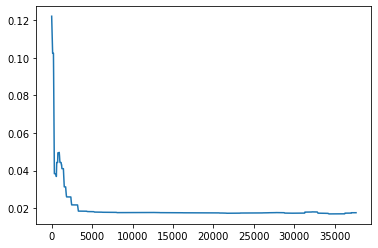

0.016948005184531212
0.18713099776504272


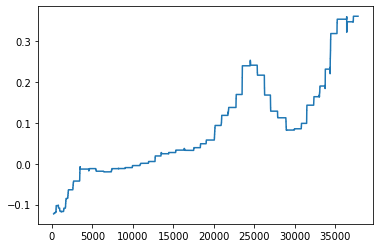

In [4]:
# TODO: experiment.score should be producing these
import matplotlib.pyplot as plt

lh = my_experiment.loss_history

task_losses = [r.task_loss for r in lh._recs if r.task_loss is not None]
plt.plot(task_losses)
plt.show()
print(min(task_losses))
print(lh.max_pct_recov)

class_sep = [r.class_separation for r in lh._recs if r.class_separation is not None]
plt.plot(class_sep)
plt.show()
